In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on New Synthetic Network</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "BAH"                    # network generative model type
N = 2000                        # number of nodes
m = 4                           # minimun degree (proxy of density)
H = 0.1                         # homophily
B = 0.3                         # class balance (minority fraction)
sampling = "nedges"              # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.2                    # fraction of nodes to sample 
epoch = 1                       # epoch (iteration number #)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
OUTPUT = "../results-individual"   # directory to store results

<h2>1. Network</h2>

In [4]:
net = Network(kind)
net.create_network(N=N,m=m,B=B,H=H)
net.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 2000
Number of edges: 7984
Average degree:   7.9840
{'attributes': ['color'], 'class': 'color', 'group': ['M', 'm'], 'labels': ['blue', 'red'], 'name': 'homophilic_barabasi_albert', 'kind': 'BAH', 'N': 2000, 'm': 4, 'B': 0.3, 'H': 0.1, 'i': 1, 'x': 1, 'n': 2000, 'e': 7984, 'h': 0.1, 'b': 0.3, 'min_degree': 4, 'k': 7.984, 'km': 12.293333333333333, 'kM': 6.137142857142857, 'fullname': 'BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.3-kM6.1'}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 401
Number of edges: 261
Average degree:   1.3017
{'attributes': ['color'], 'class': 'color', 'group': ['M', 'm'], 'labels': ['blue', 'red'], 'name': 'homophilic_barabasi_albert', 'kind': 'BAH', 'N': 401, 'm': 1, 'B': 0.35910224438902744, 'H': 0.06919645319563346, 'i': 1, 'x': 1, 'e': 261, 'h': 0.1, 'k': 1.3017456359102244, 'km': 1.7013888888888888, 'kM': 1.0778210116731517, 'fullname': 'BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.3-kM6.1', 'pseeds': 0.2, 'method': 'nedges', 'epoch': 1}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

blue    0.640199
red     0.359801
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          blue       red
blue  0.154122  0.845878
red   0.955466  0.044534


<h2>4. Inference</h2>

In [8]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1.6640740515243272e-33, 3.236556449654172e-08, 1.333032678175188e-19, 0.0004378496495686818, 2.362580428958953e-05)

Prediction in 489.44614362716675 seconds
ROCAUC: 0.9991385397000815
ROCAUC curve: 0.9991385397000815
MAE: 0.01938711694809256
ccm: 0.9517543859649122
ccM: 0.9921259842519685
bias: 0.48961571943788085

BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.3-kM6.1_nedges creating...
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.3-kM6.1_nedges created!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.3-kM6.1_nedges/P20_graph.gpickle saved!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.3-kM6.1_nedges/P20_samplegraph.gpickle saved!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.3-kM6.1_nedges/P20_evaluation.pickle saved!


<h2>5. Results</h2>

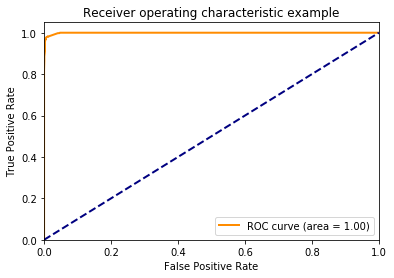

In [9]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)